In [ ]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Extracting data and initial probing:
data_path = '/content/wdbc.data'
sample_data = pd.read_csv(data_path)
sample_data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Extracting Subset of Data and Refactoring Column Names:
extracted_data = sample_data

column_labels = ['ID', 'Diagnosis', 'raidus1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1',
                 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
                 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
                 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
                 'symmetry3', 'fractal_dimensions3']
breast_cancer_frame = extracted_data.T.reset_index().T.reset_index(drop=True).set_axis(column_labels, axis=1)
breast_cancer_frame

,ID,Diagnosis,raidus1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimensions3
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,...,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115
565,926682,M,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,927241,M,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,...,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124


In [ ]:
#Verifying that there are no empty values in the Data:
is_null_set = breast_cancer_frame.isnull()
is_null_set.shape

is_empty = is_null_set.values.any()

print(is_empty)

NameError: ignored

<BarContainer object of 2 artists>

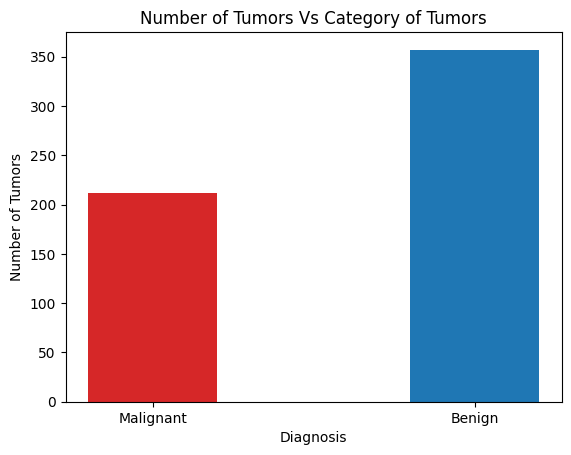

In [ ]:
#Plotting Binary Decisions (Tumors):
fig1, axes = plt.subplots()

num_malignant = breast_cancer_frame[breast_cancer_frame['Diagnosis'] == 'M'].shape[0]
num_benign = breast_cancer_frame[breast_cancer_frame['Diagnosis'] == 'B'].shape[0]
bar_colors = ["tab:red", "tab:blue"]

axes.set_title("Number of Tumors Vs Category of Tumors")
axes.set_xlabel("Diagnosis")
axes.set_ylabel("Number of Tumors")
axes.bar(['Malignant', 'Benign'], [num_malignant, num_benign], width=0.4, color=bar_colors)

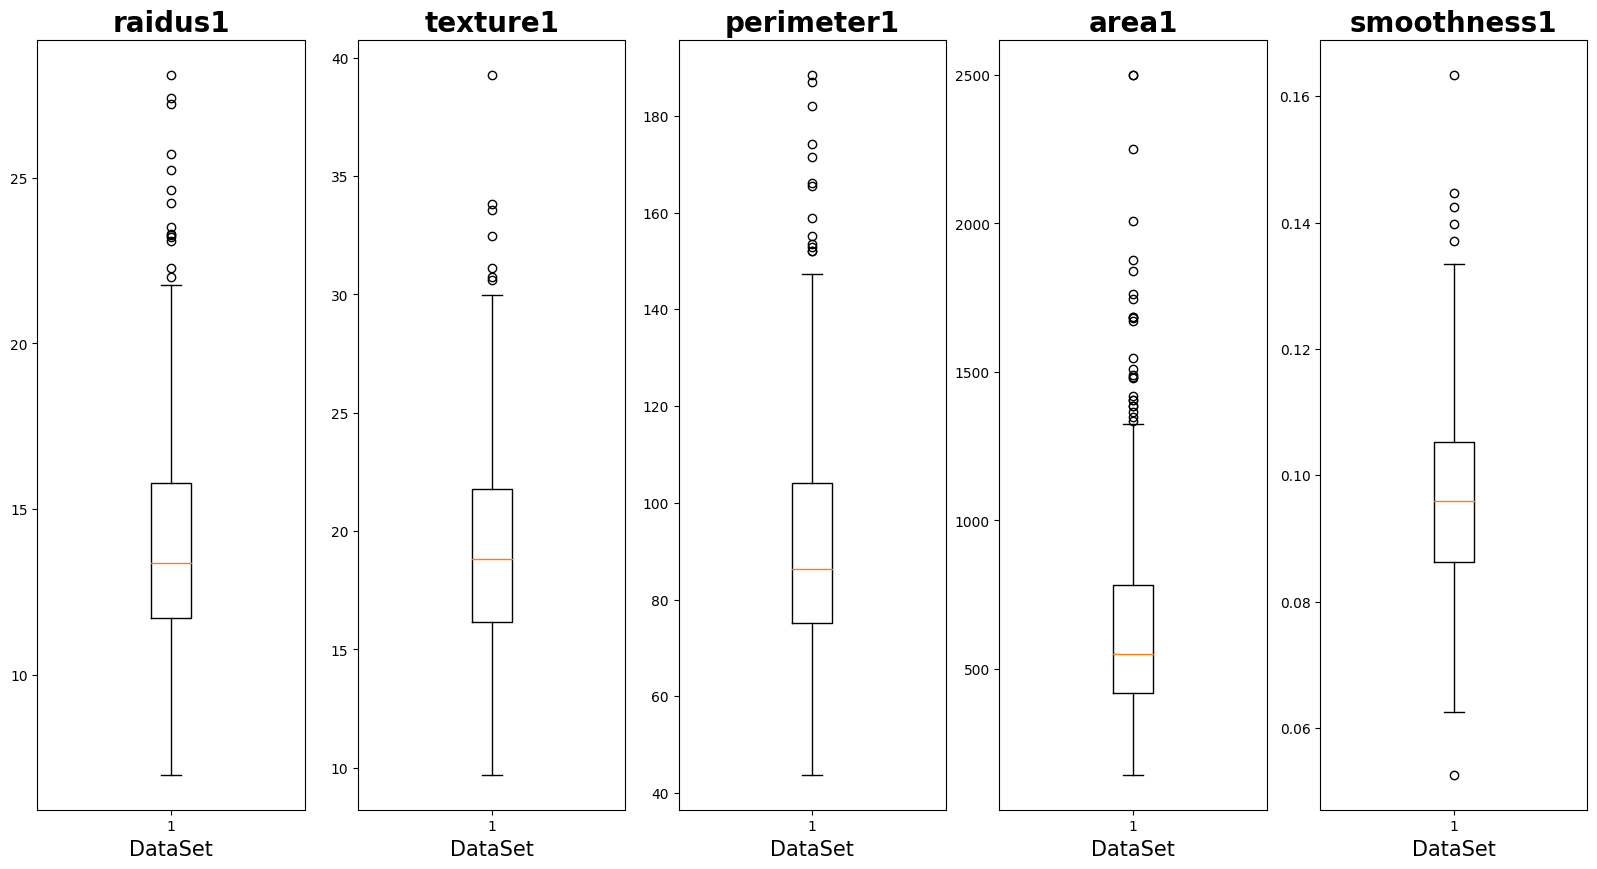

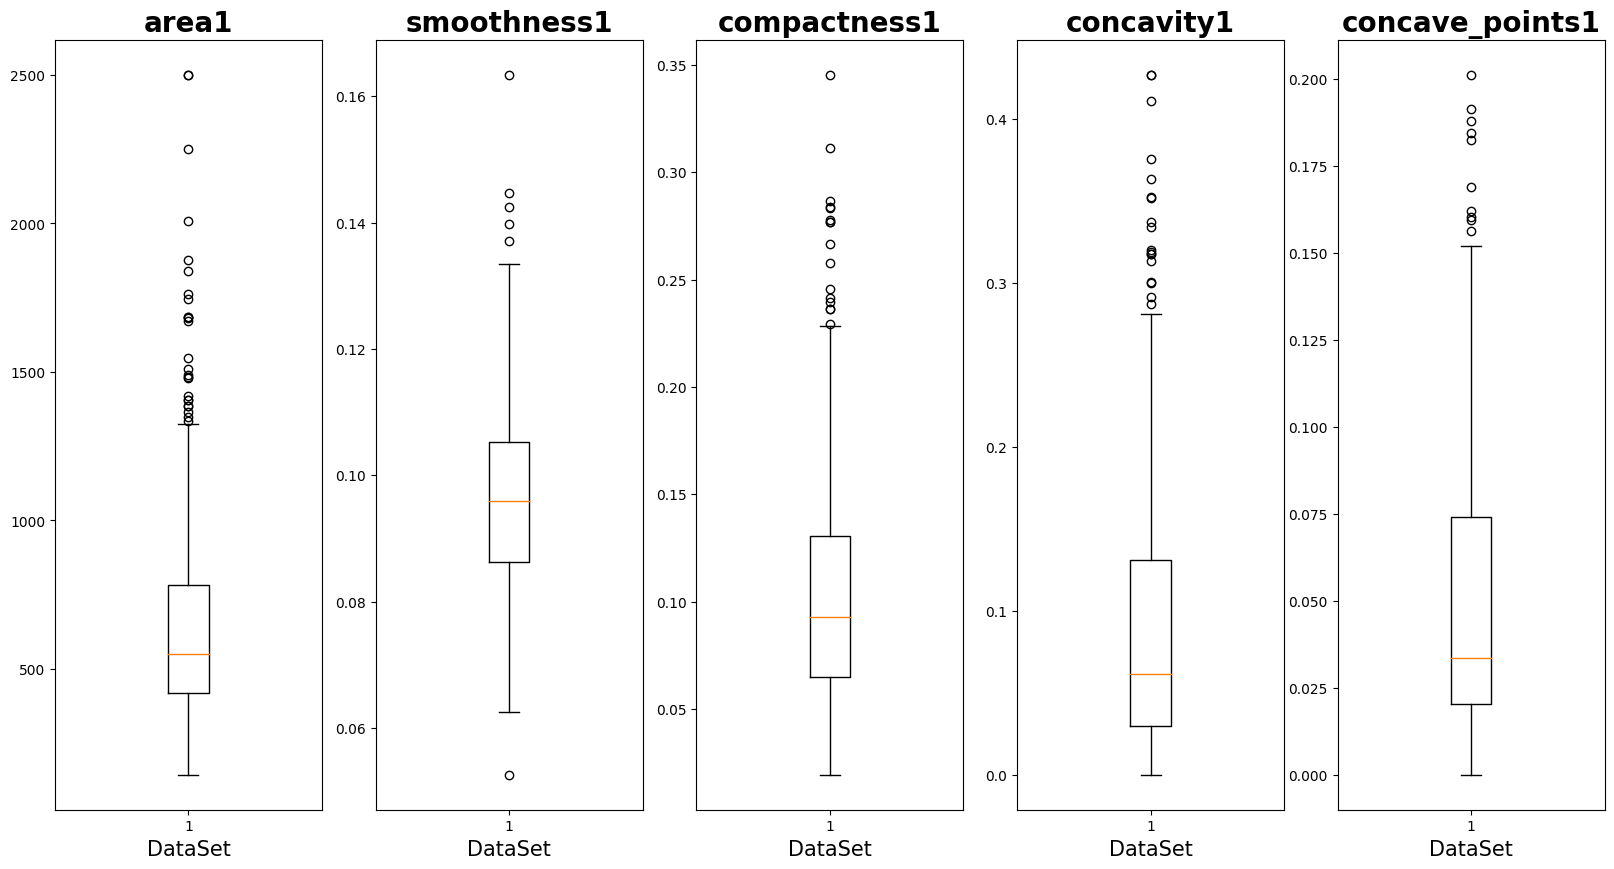

In [ ]:
#Generating Whisker Plots:
#Change this param for different feature selection:
select_features = 10

select_features_displacement = select_features + 2

converted_whisker_data = breast_cancer_frame.iloc[0:569, 2:select_features_displacement].apply(lambda x: pd.to_numeric(x), axis=1)

#Change params for different feature select:
num_figures = 2
num_axes = 5
axis_list = []

list_of_boxplot_stats = []

for i in range(num_figures):
  fig, axes = plt.subplots(1, num_axes, figsize=(20, 10))
  axis_list.append((fig, axes))

for i in range(len(axis_list)): # Will go to 10
  for j in range(num_axes):
    column_to_read = (i*3 + j)
    temp_axis = axis_list[i][1][j]
    temp_axis.boxplot(converted_whisker_data.iloc[0:, column_to_read])
    list_of_boxplot_stats.append(plt.cbook.boxplot_stats(converted_whisker_data.iloc[0:, column_to_read]))
    temp_axis.set_title(converted_whisker_data.columns[column_to_read], fontsize=20, fontweight='bold')
    temp_axis.set_xlabel("DataSet", fontsize=15)

<BarContainer object of 2 artists>

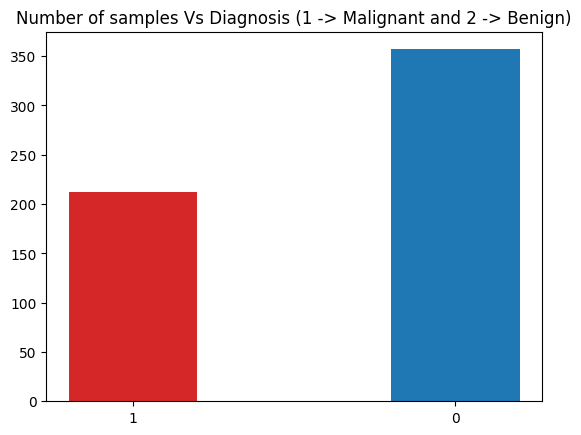

In [ ]:
#Transforming cancer labels into binary classes(1 for Malignant and 0 for Benign):
breast_cancer_frame.Diagnosis = breast_cancer_frame["Diagnosis"].transform(lambda x: 1 if x == 'M' else 0)
sample_diagnosis_malignant_count = breast_cancer_frame[breast_cancer_frame["Diagnosis"] == 1].shape[0]
sample_diagnosis_benign_count = breast_cancer_frame[breast_cancer_frame["Diagnosis"] == 0].shape[0]

# print("Malignant categories:")
# print(sample_diagnosis_malignant["Diagnosis"])
# print("Benign categories:")
# print(sample_diagnosis_benign["Diagnosis"])

plt.title("Number of samples Vs Diagnosis (1 -> Malignant and 2 -> Benign)")
plt.bar(['1', '0'], [sample_diagnosis_malignant_count, sample_diagnosis_benign_count], width=0.4, color=bar_colors)

In [ ]:
#Set up imputation if needed: Maybe we need to impute the outliers to prevent nearest neighbor errors?
list_of_boxplot_stats[0]

[{'mean': 14.127291739894552,
  'iqr': 4.08,
  'cilo': 13.10146327857123,
  'cihi': 13.638536721428768,
  'whishi': 21.75,
  'whislo': 6.981,
  'fliers': array([25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51,
         25.73, 22.01, 27.42, 23.09, 24.63]),
  'q1': 11.7,
  'med': 13.37,
  'q3': 15.78}]

In [ ]:
#Separating data into x and y:
X = converted_whisker_data.values
Y = breast_cancer_frame.Diagnosis.values

print(X.shape)
print(Y.shape)

(569, 10)
(569,)


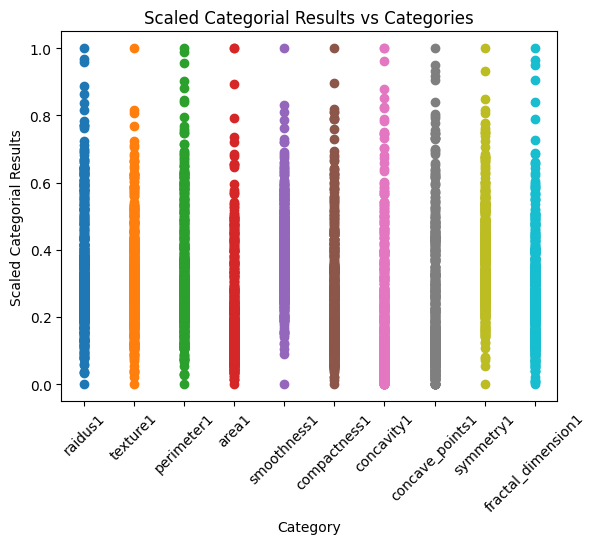

In [ ]:
#Ensuring MinMax scales data accurately:
min_max_fig, min_max_axes = plt.subplots()

feature_names = converted_whisker_data.columns

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)

X_scaled = min_max_scaler.transform(X)

x_n = X_scaled.shape[0]
x_y = X_scaled.shape[1]

plt.title("Scaled Categorial Results vs Categories")
plt.xlabel("Category")
plt.ylabel("Scaled Categorial Results")
plt.xticks(rotation=45)

counter = 0
for feature_name in feature_names:
  plt.scatter([feature_name] * x_n, X_scaled[0:, counter], )
  counter+= 1

In [ ]:
#Plotting Some Variable Axis to Monitor the data discrepancies prior to train test splitting:
num_features_to_use = 10
max_subplots_per_fig = 3

#Making color maps:
cmap = colors.ListedColormap(['blue', 'red'])

new_canvas, axes = plt.subplots(1, 3, figsize=(16, 6))
subplot_count = 0
for i in range(num_features_to_use - 1):
  for j in (range(i + 1, num_features_to_use)):
    if (subplot_count == 3):
      new_canvas, axes = plt.subplots(1, 3, figsize=(16, 6))
      subplot_count = 0
    axes[subplot_count].scatter(X_scaled[0:, i], X_scaled[0:, j], c=Y, cmap=cmap)
    axes[subplot_count].set_title("Tumor Diagnosis (Red=M, Blue=B) Vs Data Dimensions", fontsize=10)
    axes[subplot_count].set_xlabel(column_labels[i + 2])
    axes[subplot_count].set_ylabel(column_labels[j + 2])
    subplot_count += 1

NameError: ignored

Ratios of training data:
0.37362637362637363
Ratios of testing data:
0.3684210526315789


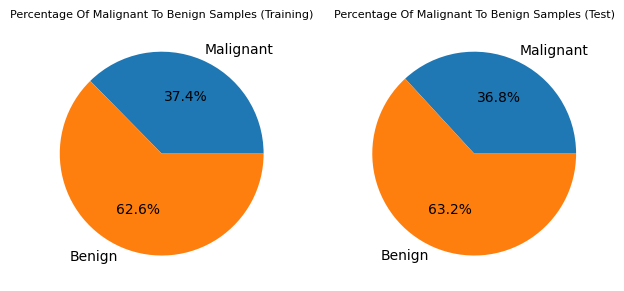

In [ ]:
#Visualizing hold out data split:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, train_size=0.8)

percentage_of_train_malignant = (y_train[y_train == 1].shape[0]) / y_train.shape[0]
percentage_of_test_malignant = (y_test[y_test == 1].shape[0]) / y_test.shape[0]

scaled_fig, scaled_axes = plt.subplots(1, 2)
labels = ['Malignant', 'Benign']

scaled_fig.tight_layout()

scaled_axes[0].set_title("Percentage Of Malignant To Benign Samples (Training)", fontsize=8)
scaled_axes[0].pie([percentage_of_train_malignant, 1 - percentage_of_train_malignant], labels=labels, autopct='%1.1f%%')
scaled_axes[1].set_title("Percentage Of Malignant To Benign Samples (Test)", fontsize=8)
scaled_axes[1].pie([percentage_of_test_malignant, 1 - percentage_of_test_malignant], labels=labels, autopct='%1.1f%%')

print("Ratios of training data:")
print(percentage_of_train_malignant)
print("Ratios of testing data:")
print(percentage_of_test_malignant)

In [ ]:
#Generating our data pipeline and passing it into a grid search for exploration:
def ExploreTestTrainSplit(x_train, x_test, y_train, y_test):
  params_to_explore = [x for x in range(1, 11)]

  knn_classifier = KNeighborsClassifier()
  min_max_scaler = MinMaxScaler()

  knn_pipeline = Pipeline([('scaler', min_max_scaler), ('knn_classifier', knn_classifier)])
  param_dictionary = {'knn_classifier__n_neighbors': params_to_explore}

  knn_gridsearch = GridSearchCV(knn_pipeline, param_dictionary, scoring='f1')
  knn_gridsearch.fit(x_train, y_train)

  best_param = knn_gridsearch.best_params_['knn_classifier__n_neighbors']
  best_param_score = knn_gridsearch.best_score_
  k_scores = knn_gridsearch.cv_results_['mean_test_score']

  best_test_score = knn_gridsearch.score(x_test, y_test)

  return {'best_param': best_param, 'best_param_score': best_param_score, 'k_scores': k_scores, 'best_test_score': best_test_score, 'params_to_explore': params_to_explore}


Iteration 1
Best Estimator param:
k = 5 with a score of 0.9204412719013628!
Score against test set is: 0.9176470588235294!
Iteration 2
Best Estimator param:
k = 10 with a score of 0.9271365504493344!
Score against test set is: 0.9367088607594937!
Iteration 3
Best Estimator param:
k = 9 with a score of 0.9190528405675671!
Score against test set is: 0.9523809523809523!
Iteration 4
Best Estimator param:
k = 8 with a score of 0.9240093240093241!
Score against test set is: 0.9761904761904762!
Iteration 5
Best Estimator param:
k = 6 with a score of 0.9218075196912962!
Score against test set is: 0.9268292682926829!


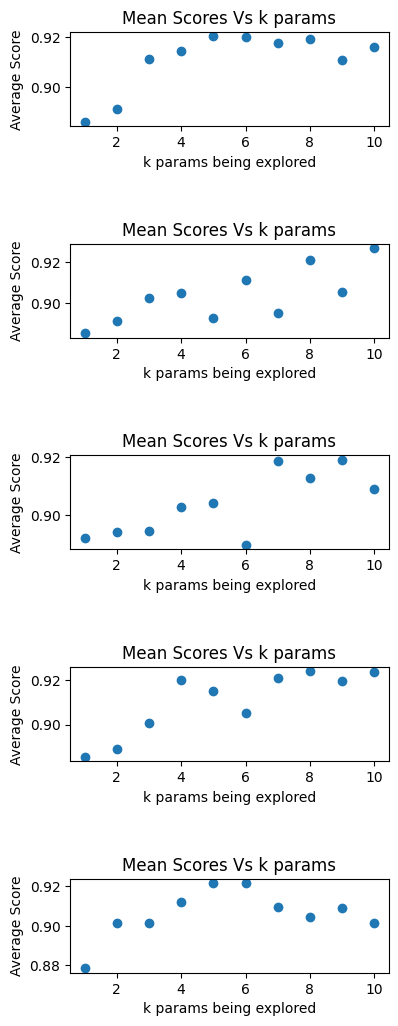

In [ ]:
#Testing the ExploreTrainTestSplit:
num_of_iterations = 5

result_fig, result_axes = plt.subplots(num_of_iterations, 1, figsize=(4, 2*(num_of_iterations)))
result_fig.tight_layout()

plt.subplots_adjust(hspace = 1.25)

#Testing results across different iterations:
for i in range(num_of_iterations):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, train_size=0.8)
  results = ExploreTestTrainSplit(x_train, x_test, y_train, y_test)

  print("Iteration {}".format(i + 1))
  print("Best Estimator param:")
  print("k = {} with a score of {}!".format(results['best_param'], results['best_param_score']))
  print("Score against test set is: {}!".format(results['best_test_score']))

  #Plotting the results of the mean scores:
  result_axes[i].set_title("Mean Scores Vs k params")
  result_axes[i].set_xlabel("k params being explored")
  result_axes[i].set_ylabel("Average Score")
  result_axes[i].scatter(results['params_to_explore'], results['k_scores'])

In [ ]:
#Looking for the best param given a number of appearances:
num_of_iterations = 50

reappearance_rate = {}

for k in range(1, 11):
  reappearance_rate[k] = [0, 0]

#Testing results across different iterations:
for i in range(num_of_iterations):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, train_size=0.8)
  results = ExploreTestTrainSplit(x_train, x_test, y_train, y_test)
  reappearance_rate[results['best_param']][0] += 1
  reappearance_rate[results['best_param']][1] += results['best_test_score']

for i in range(1, 11):
  reappearance_rate[i][1] = reappearance_rate[i][1] / reappearance_rate[i][0] if reappearance_rate[i][0] != 0 else reappearance_rate[i][1]

list_of_appearances = list(reappearance_rate.items())

print(list_of_appearances)

list_of_appearances = sorted(list_of_appearances, key=lambda x: x[1][1])

print("Best Estimator param:")
print("k = {}! with an average score of {}!".format(list_of_appearances[-1][0], list_of_appearances[-1][1][1]))

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Fold 0:
  Train: index=[ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 2